# Decision Tree

In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn import tree

## Data

In [72]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [73]:
# Variable Types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

### Data Cleaning

In [74]:
# Cylinders should be Categorical
df['cylinders'] = df['cylinders'].astype(object)

In [75]:
# Change ? in horsepower should to 0
df['horsepower'].replace('?',0, inplace=True)

C:\Users\isiom\AppData\Local\Temp\ipykernel_14752\4071399207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?',0, inplace=True)


In [76]:
# Change horsepower to numeric
df['horsepower'] = df['horsepower'].astype(int)

In [77]:
# Origin should be Categorical
df['origin'] = df['origin'].astype(object)

## Exploratory Data Analysis

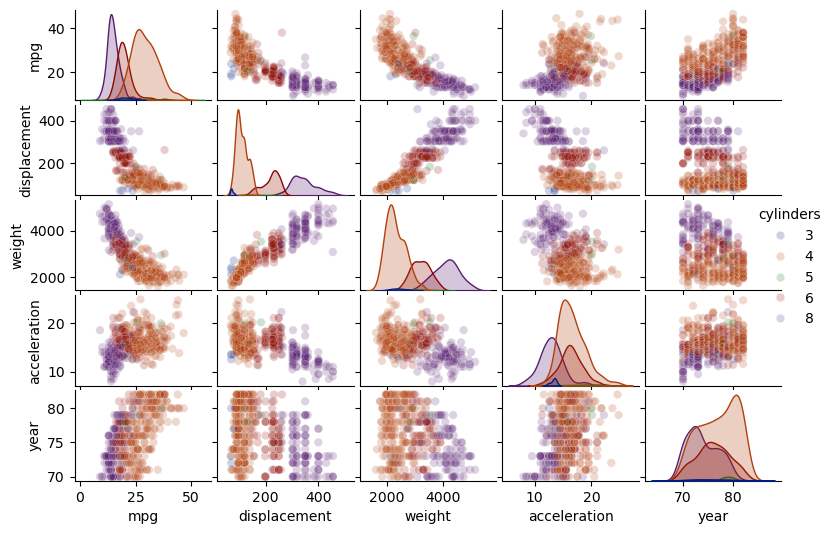

In [78]:
import seaborn as sns

num_columns = ['mpg','displacement','weight','acceleration','year']
_pair = sns.pairplot(data=df,
                     vars=num_columns,
                     hue='cylinders',
                     plot_kws={'alpha': 0.2},
                     palette='dark',
                     height=3)
_pair.fig.set_size_inches(8,5)

### Data Splitting

In [79]:
# Get Features
X = df.drop(['mpg','name'], axis=1).copy()
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [80]:
# Get Target Variable
y = df['mpg'].copy()
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

#### Train Test Split

In [81]:
# Split the data for Fitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

## Fit

### K Nearest Neighboors

In [27]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor()
fit_knn = model_knn.fit(X_train, y_train)

In [29]:
fit_knn.score(X_test, y_test)

0.7215441653509538

### Linear Regression

#### Preprocess

In [82]:
# Seperate Categorical and Numerical Variables
from sklearn.compose import make_column_selector as selector

cat_column_selector = selector(dtype_include=object)
num_column_selector = selector(dtype_exclude=object)

cat_columns = cat_column_selector(X_train)
num_columns = num_column_selector(X_train)

In [83]:
# Select Preprocessors
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_preprocessor = OneHotEncoder(handle_unknown='ignore')
num_preprocessor = StandardScaler()

In [84]:
# Create Transformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([('one-hot-encoder',cat_preprocessor,cat_columns),
                                  ('standard_scaler',num_preprocessor,num_columns)])

### Fit

In [87]:
# Create Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model_reg = make_pipeline(preprocessor, LinearRegression())
model_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cylinders', 'origin']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration',
                                                   'year'])])),
                ('linearregression', LinearRegression())])

In [88]:
# Fit
model_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cylinders', 'origin']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration',
                                                   'year'])])),
                ('linearregression', LinearRegression())])

In [90]:
# Evaluate
model_reg.score(X_test, y_test)

0.8526475053658823

#### Cross Validation

In [92]:
# Evaluate using cross validation
from sklearn.model_selection import cross_validate

cv_result_reg = cross_validate(model_reg, X_train, y_train, cv=5)
cv_result_reg

{'fit_time': array([0.01744509, 0.01688099, 0.04918814, 0.01639771, 0.00752234]),
 'score_time': array([0.00603247, 0.0069325 , 0.00803876, 0.00578141, 0.0040791 ]),
 'test_score': array([0.77786409, 0.86291072, 0.82791742, 0.81806567, 0.79517386])}

### Decision Tree

In [45]:
# Initialize the model
clf = tree.DecisionTreeRegressor(criterion='squared_error',
                                 splitter='best',
                                 max_depth=3,
                                 max_features=None,
                                 min_impurity_decrease=0,
                                 ccp_alpha=0,
                                 random_state=1)
clf.get_params()

{'ccp_alpha': 0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [47]:

clf = clf.fit(X=X, y=y)

### Feature Importance

In [54]:
# What are the most important variables
features = pd.DataFrame(clf.feature_importances_, index=X_train.columns)
features

,0
cylinders,0.704571
displacement,0.000000
horsepower,0.179465
weight,0.000000
acceleration,0.000000
year,0.115965
origin,0.000000
